# Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Data

In [5]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize Examples

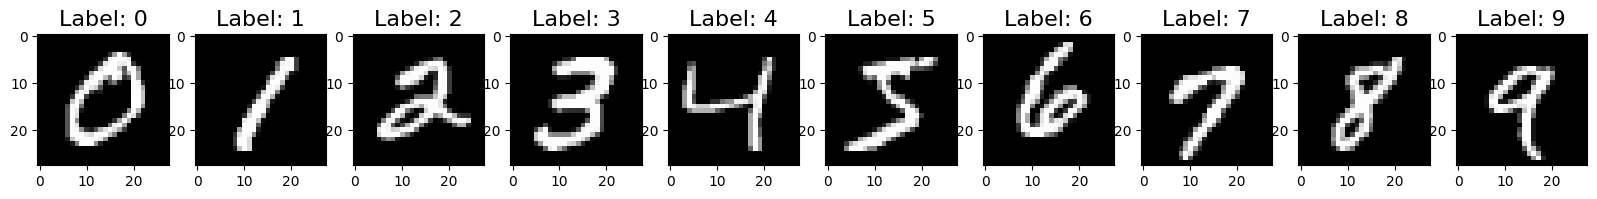

In [17]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)


In [20]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [23]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [24]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare Data

In [25]:
# Normalize Data
x_train = x_train/255.0
x_test = x_test/255.0

In [29]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)

(60000, 784)


# Create Model - Fully Connected Neural Network

In [32]:
model = Sequential()
model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train

In [33]:
batch_size = 512
epochs= 10
model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=epochs)

Epoch 1/10
118/118 [==============================] - 3s 11ms/step - loss: 0.5718 - accuracy: 0.8354
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 0.2245 - accuracy: 0.9349
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1652 - accuracy: 0.9528
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1311 - accuracy: 0.9616
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1104 - accuracy: 0.9673
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0929 - accuracy: 0.9722
Epoch 7/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0795 - accuracy: 0.9754
Epoch 8/10
118/118 [==============================] - 2s 18ms/step - loss: 0.0700 - accuracy: 0.9783
Epoch 9/10
118/118 [==============================] - 2s 18ms/step - loss: 0.0614 - accuracy: 0.9819
Epoch 10/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0540 - accura

# Evaluate

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss: {} , Test accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0724 - accuracy: 0.9789
Test loss: 0.07238549739122391 , Test accuracy: 0.9789000153541565


In [37]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 5ms/step
[[1.52475150e-06 4.67261907e-06 1.64183602e-05 ... 9.99778271e-01
  2.83847658e-06 2.89148247e-05]
 [5.27263708e-08 5.72089525e-03 9.94277239e-01 ... 2.77955678e-07
  1.85203945e-07 3.85180360e-11]
 [2.36116921e-06 9.99193013e-01 1.24879341e-04 ... 4.47590515e-04
  5.00598726e-05 4.59568673e-06]
 ...
 [3.09835491e-11 1.32119093e-09 2.62060621e-12 ... 6.41103668e-08
  5.99949487e-07 1.21932489e-05]
 [4.82955009e-08 2.21388063e-08 1.05494458e-08 ... 4.37349144e-08
  1.52846078e-05 8.13622947e-09]
 [2.06582946e-08 2.35266229e-09 3.57063179e-08 ... 5.74706211e-12
  1.10438506e-07 1.81967816e-10]]
[7 2 1 ... 4 5 6]


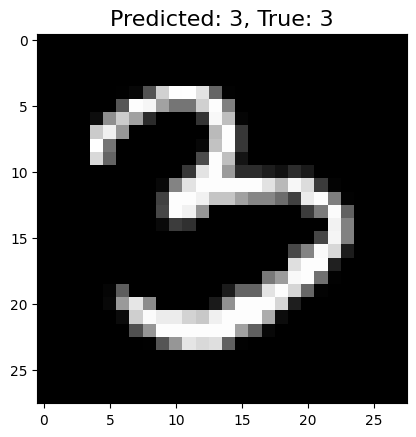

In [50]:
# Singe Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')